# Outlier Detection Techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

## A.Univariate Outliers

In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
heart.shape

(1025, 14)

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

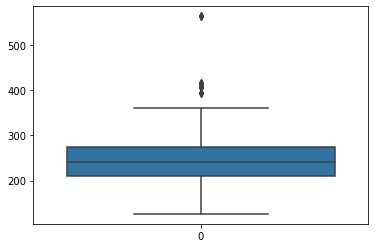

In [6]:
sns.boxplot(data = heart.chol)
plt.show()

### 1.Interquartile Range Method

In [7]:
def out_iqr(data, column):
    global lower, upper
    q25 = np.quantile(data[column], 0.25)
    q75 = np.quantile(data[column], 0.75)
    iqr = q75 - q25
    
    cut_off = iqr * 1.5
    
    lower = q25 - cut_off
    upper = q75 + cut_off
    
    print('The IQR value is', iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    
    lower_df = data[data[column] < lower]
    upper_df = data[data[column] > upper]
    
    outliers_total_num = len(lower_df) + len(upper_df)
    print(f"This dataset has {outliers_total_num} outliers")

In [8]:
out_iqr(heart, 'chol')

The IQR value is 64.0
The lower bound value is 115.0
The upper bound value is 371.0
This dataset has 16 outliers


### Visual representation

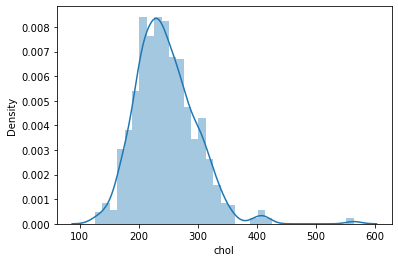

In [9]:
sns.distplot(heart.chol)
plt.show()

In [10]:
#Data Frame without outliers
heart_without_outliers = heart[(heart['chol'] < upper) & (heart['chol'] > lower)]

In [11]:
print(heart.shape)
print(heart_without_outliers.shape)

(1025, 14)
(1009, 14)


### 2.Standard Deviation Method

In [12]:
students = pd.read_csv('StudentsPerformance.csv')

In [13]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


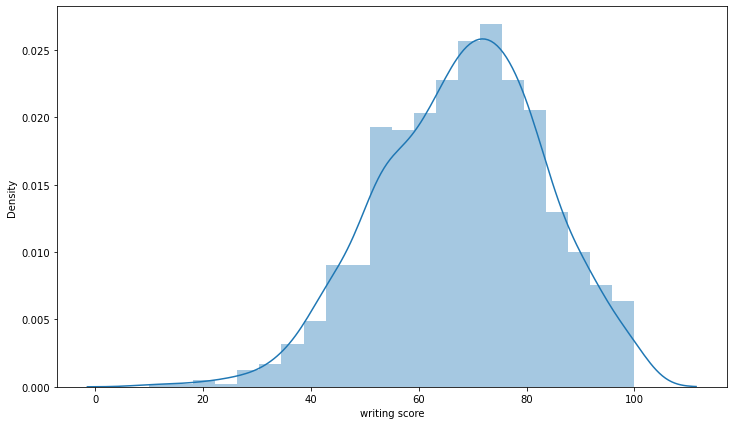

In [14]:
plt.figure(figsize = (12,7))
sns.distplot(students['writing score'])
plt.show()

In [15]:
def out_std(data, column):
    global lower, upper
    col_mean = data[column].mean()
    col_std = data[column].std()
    
    cutoff = col_std * 3
    
    lower = col_mean - cutoff
    upper = col_mean + cutoff
    
    print("The lower bound value is: ", lower)
    print("The upper bound value is: ", upper)
    
    num_of_outs = len(data[(data[column] < lower) | (data[column] > upper)])
    
    print("Total number of outliers are : ", num_of_outs)

In [16]:
out_std(students, 'writing score')

The lower bound value is:  22.467028967391073
The upper bound value is:  113.64097103260893
Total number of outliers are :  4


### Visual Representation

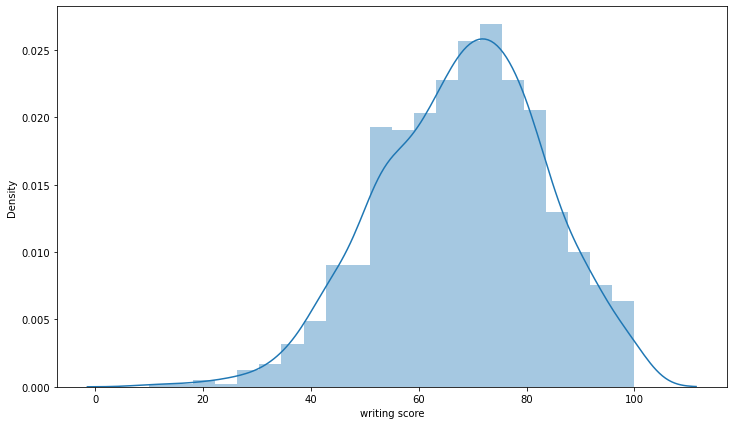

In [17]:
plt.figure(figsize = (12, 7))
sns.distplot(students['writing score'])
plt.show()

In [18]:
#Data Frame without outliers
students_without_outliers = students[(students['writing score'] < upper) & (students['writing score'] > lower)]

In [19]:
print(students.shape)
print(students_without_outliers.shape)

(1000, 8)
(996, 8)


### 3.Z-Score method

In [20]:
insurance = pd.read_csv('insurance.csv')

In [21]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

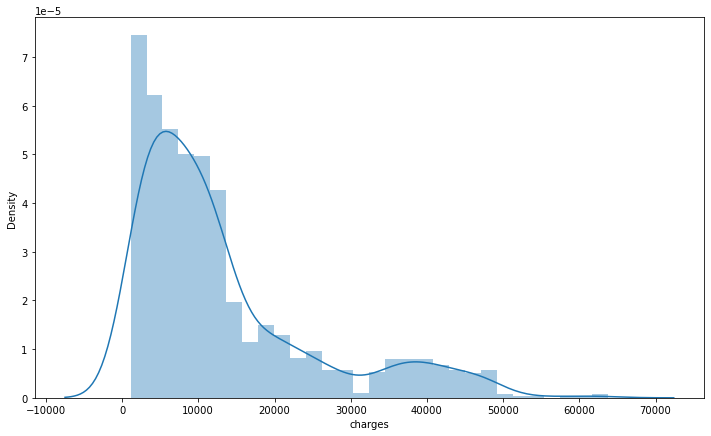

In [24]:
plt.figure(figsize = (12, 7))
sns.distplot(insurance['charges'])
plt.show()

In [25]:
def zscore_outlier(data):
    global outliers, zscores, data_mean, data_std
    outliers = []
    zscores = []
    threshold = 3
    data_mean = np.mean(data)
    data_std = np.std(data)
    for i in data:
        zscore = (i - data_mean)/data_std
        zscores.append(zscore)
        if np.abs(zscore) > threshold:
            outliers.append(i)
    print("Total number of outliers are: ",len(outliers))

In [26]:
zscore_outlier(insurance['charges'])

Total number of outliers are:  7


### Visual Representation

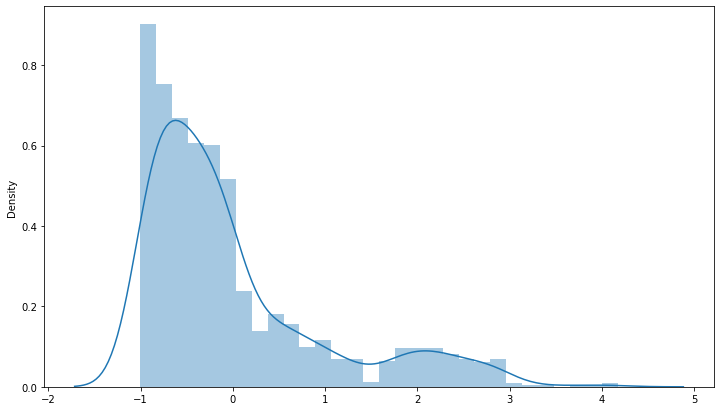

In [27]:
plt.figure(figsize = (12, 7))
sns.distplot(zscores)
plt.show()

In [28]:
#Data without outliers
insurance_without_outliers = insurance[((insurance['charges'] - data_mean)/ data_std > -3) & ((insurance['charges'] - data_mean)/ data_std < 3)]

In [29]:
print(insurance.shape)
print(insurance_without_outliers.shape)

(1338, 7)
(1331, 7)


## B.Mulitivariate Outliers

### 1) DBSCAN

In [30]:
insurance = pd.read_csv('insurance.csv')

In [31]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
X = insurance[['age', 'bmi']]

In [33]:
db = DBSCAN(eps = 3.0, min_samples= 10)
db.fit(X)

DBSCAN(eps=3.0, min_samples=10)

In [34]:
pd.Series(db.labels_).value_counts()

 0    1312
-1      26
dtype: int64

In [35]:
labels = pd.DataFrame(db.labels_, columns=['labels'])
df = pd.concat([X, labels], axis = 1)

In [36]:
df.head()

,age,bmi,labels
0,19,27.900,0
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0


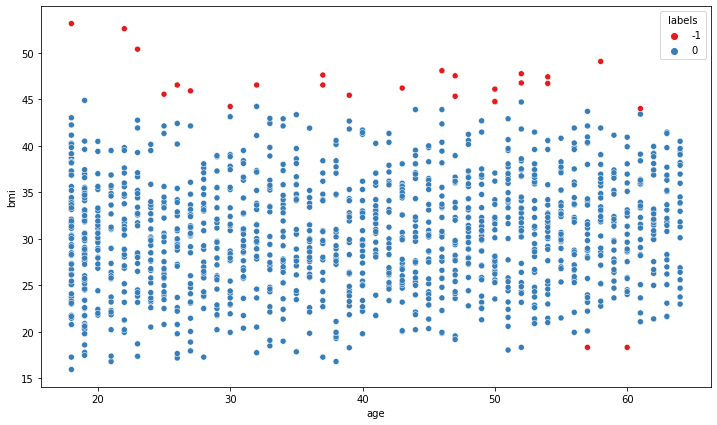

In [37]:
plt.figure(figsize = (12, 7))
sns.scatterplot(x = 'age', y = 'bmi', data = df, hue = 'labels', palette = 'Set1')
plt.show()